In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline 

newparams = {'figure.figsize': (12, 6), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}

plt.rcParams.update(newparams)

<h1>Innlastning av eksperimentell data</h1>

In [22]:
#Laster inn data fra forsøket

folder_path = "../data"
dfs = []
files = os.listdir(folder_path)
for i in range(len(files)):
    print(files[i])
    temp = pd.read_csv(f"{folder_path}/{files[i]}", sep="\t", header=1)
    temp["file"] = files[i]
    dfs.append(temp)
df = pd.concat(dfs).reset_index(drop=True)

Hul - sylinder - lav - fmax.txt
hul - sylinder - midt - fmax.txt
hul - sylinder - topp -fmax.txt
Hul-Sylinder-Bunn-fmax.txt
Hul-Sylinder-Bunn-Vanlig.txt
hul-sylinder-midt-fmax
Hul-Sylinder-Midt-Vanlig.txt
hul-sylinder-topp-fmax
Hul-Sylinder-Topp-Vanlig.txt
kompakt-sylinder-bunn-fmin
Kompakt-Sylinder-Midt-fmax.txt
kompakt-sylinder-midt-fmin
Kompakt-Sylinder-Midt-Vanlig.txt
Kompakt-Sylinder-Topp-fmax.txt
kompakt-sylinder-topp-fmin
Kompakt-Sylinder-Topp-Vanlig.txt
Kompakt_Sylinder-Bunn-Vanlig.txt
kule - midt - fmax
kule2 - bunn - fmax


C:\Users\Sindre\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [24]:
#Behandling av data:

#Tracker måler vinkel fra x-aksen, vi vil ha fra y-aksen. Konverterer til grader
df["theta"] = (np.pi/2 - df["θ_{r}"])*180/np.pi


#Skriver ut sluttvinkel for de aktuelle forsøkene. Dette er i radianer
for file in files:
    end_angle = df[df["file"]==file]["theta"].iloc[-1]
    print(f"{file} sluttvinkel: {end_angle:.04}")
df[df["file"]=="Kompakt-Sylinder-Topp-fmax.txt"]

Hul - sylinder - lav - fmax.txt sluttvinkel: 73.68
hul - sylinder - midt - fmax.txt sluttvinkel: 74.65
hul - sylinder - topp -fmax.txt sluttvinkel: 66.84
Hul-Sylinder-Bunn-fmax.txt sluttvinkel: 69.95
Hul-Sylinder-Bunn-Vanlig.txt sluttvinkel: 73.73
hul-sylinder-midt-fmax sluttvinkel: 65.99
Hul-Sylinder-Midt-Vanlig.txt sluttvinkel: 65.51
hul-sylinder-topp-fmax sluttvinkel: 63.27
Hul-Sylinder-Topp-Vanlig.txt sluttvinkel: 66.05
kompakt-sylinder-bunn-fmin sluttvinkel: 72.77
Kompakt-Sylinder-Midt-fmax.txt sluttvinkel: 59.78
kompakt-sylinder-midt-fmin sluttvinkel: 71.89
Kompakt-Sylinder-Midt-Vanlig.txt sluttvinkel: 65.77
Kompakt-Sylinder-Topp-fmax.txt sluttvinkel: 58.62
kompakt-sylinder-topp-fmin sluttvinkel: 67.94
Kompakt-Sylinder-Topp-Vanlig.txt sluttvinkel: 65.88
Kompakt_Sylinder-Bunn-Vanlig.txt sluttvinkel: 67.51
kule - midt - fmax sluttvinkel: 72.29
kule2 - bunn - fmax sluttvinkel: 78.33


,file,t,v,x,y,θ_{r},theta
1035,Kompakt-Sylinder-Topp-fmax.txt,0.01,NaN,0.042981,0.526886,1.489402,4.663558
1036,Kompakt-Sylinder-Topp-fmax.txt,0.02,0.010247,0.043090,0.526849,1.489190,4.675694
1037,Kompakt-Sylinder-Topp-fmax.txt,0.03,0.016788,0.043176,0.526825,1.489024,4.685222
1038,Kompakt-Sylinder-Topp-fmax.txt,0.04,0.015379,0.043425,0.526839,1.488556,4.712034
1039,Kompakt-Sylinder-Topp-fmax.txt,0.05,0.008752,0.043484,0.526821,1.488443,4.718479
...,...,...,...,...,...,...,...
1135,Kompakt-Sylinder-Topp-fmax.txt,1.01,1.682357,0.420340,0.340586,0.680967,50.983458
1136,Kompakt-Sylinder-Topp-fmax.txt,1.02,1.730843,0.430845,0.326603,0.648634,52.835983
1137,Kompakt-Sylinder-Topp-fmax.txt,1.03,1.799404,0.441513,0.313199,0.616991,54.649009
1138,Kompakt-Sylinder-Topp-fmax.txt,1.04,1.881810,0.452783,0.298074,0.582199,56.642434


<h1>Numerisk analyse</h1>

<h2>Oppgave 1</h2>

Sluttvinkel: 48.3


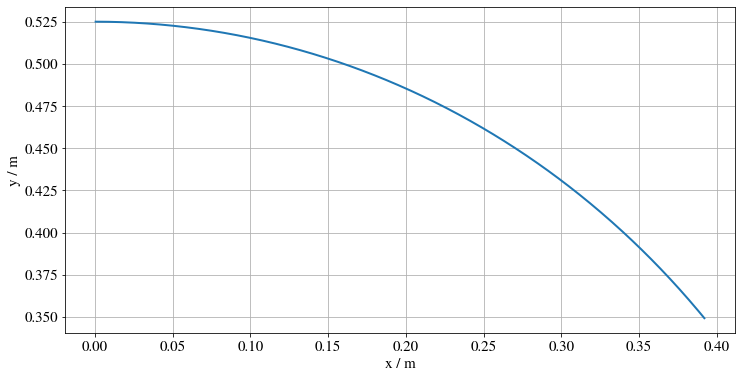

In [7]:
#Oppgave 1

r = 0.05/2             #[m] Avstanden fra banen opp til massesenter av objektet
R = 0.5              #[m] Radius til banen
m = 1.411              #[kg] Massen til objektet
g = 9.81             #[m/s^2] Gravitasjonsakselerasjonen
dt = 0.001           #[s] tidssteg for eulers metode
theta0 = 0.001        #[rad] Slippvinkel for objektet (større enn null, ellers ville det ha stått i ro på toppen)


#Funskjon som regner ut den analytiske hastigheten ved en vinkel langs banen, og returnerer denne. [m/s].
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#theta0: [rad] vinkelen objektet slippes fra
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
def v(theta, theta0, g, R):
    return np.sqrt(2*g*(R+r)*(np.cos(theta0) - np.cos(theta)))


#Funksjon som regner ut normalkraften fra banen på objektet ved en vinkel langs banen og returnerer denne [N].  
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#theta0: [rad] vinkelen objektet slippes fra
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
def N(theta, theta0, m, g):
    return m*g*(3*np.cos(theta) - 2*np.cos(theta0))


#Funksjon som regner ut analytisk vinkelen som objektet faller av banen ved, og returnerer denn [rad].
#Parametre:
#theta0: [rad] vinkelen objektet slippes fra
def theta_crit(theta0):
    return np.arccos(2/3 * np.cos(theta0))


#Funksjon som regner ut ett skritt av eulers metode for ligningssystemet til denne oppgaven, og legger til verdiene i lister
#Parametre:
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#ts: liste med tidsverdier
#thetas: liste med vinkler
#dt: [s] tidssteg for denne iterasjonen
#ws: liste med vinkelhastigheter
def euler_step(ts, dt, g, thetas, r, R, ws):
    ts.append(ts[-1] + dt)
    ws.append(ws[-1] + g*np.sin(thetas[-1])/(r+R)*dt)
    thetas.append(thetas[-1] + ws[-2]*dt)
    

#Funksjon som regner ut tid, vinkelhastighet og vinkel til denne oppgaven ved hjelp av eulers metode.
#Returnerer: liste med vinkler [rad], liste med vinkelhastigheter [rad/s], liste med tidspunkt [s]
#Parametre:
#dt: [s] tidssteg
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#theta0: [rad] vinkelen objektet slippes fra
def euler(dt, g, r, R, theta0):
    ts = [0]
    ws = [0]
    thetas = [theta0]
    while(N(thetas[-1], theta0, m, g) > 0):
        euler_step(ts, dt, g, thetas, r, R, ws)
        
    return np.array(thetas), np.array(ws), np.array(ts)

#Bruker Eulers metode til å finne vinkel, vinkelhastighet og tid for objektet langs banen
thetas, ws, ts = euler(dt, g, r, R, theta0)


#Finner x-posisjon, y-posisjon og hastihet fra den numeriske løsningen
xs = (R+r)*np.sin(thetas)
ys = (r+R)*np.cos(thetas)
vs = (R+r)*ws



#Finner analytisk hastihet og vinkler
theta_analytic = np.linspace(theta0, theta_crit(theta0), 100)
v_analytic = v(theta_analytic, theta0, g, R)


#Regner ut numerisk og analytisk mekansik energi
E_num = 1/2 * m * vs**2 + m*g*(R+r)*np.cos(thetas)
E_analytic = 1/2 * m * v_analytic**2 + m*g*(R+r)*np.cos(theta_analytic)

#Konverterer til grader
theta_analytic = theta_analytic*180/np.pi
thetas = thetas*180/np.pi

print(f"Sluttvinkel: {thetas[-1]:.03}")
plt.plot(xs, ys)
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.grid()
plt.show()

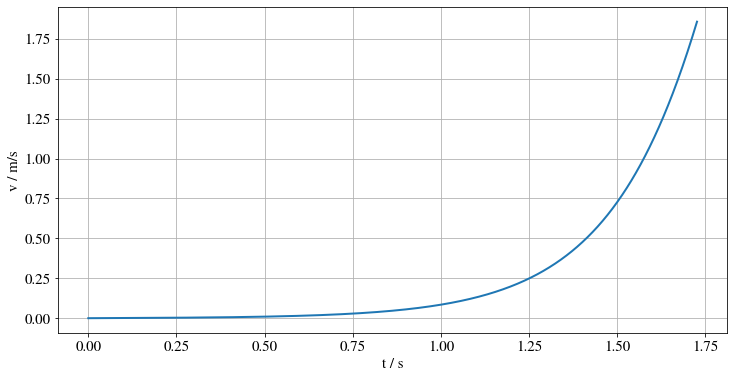

In [8]:
plt.plot(ts, vs)
plt.xlabel("t / s")
plt.ylabel("v / m/s")
plt.grid()
plt.show()

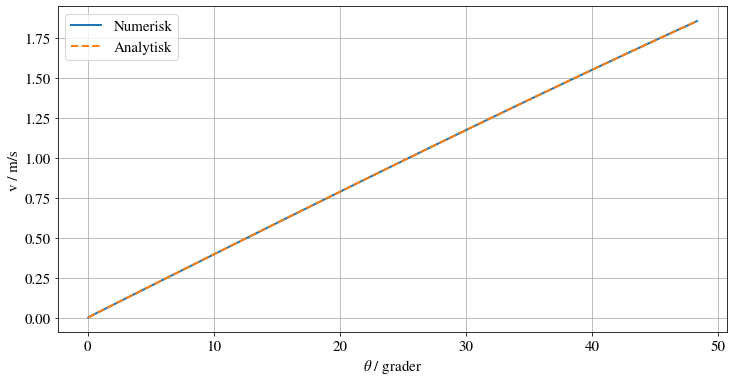

In [10]:
plt.plot(thetas, vs, label="Numerisk")
plt.plot(theta_analytic, v_analytic, "--", label = "Analytisk")
plt.xlabel(r"$\theta$ / grader")
plt.ylabel("v / m/s")
plt.legend()
plt.grid()

In [11]:
print(vs[-1])

1.8570903881299616


0.006419888866532548


Text(0, 0.5, 'E / J')

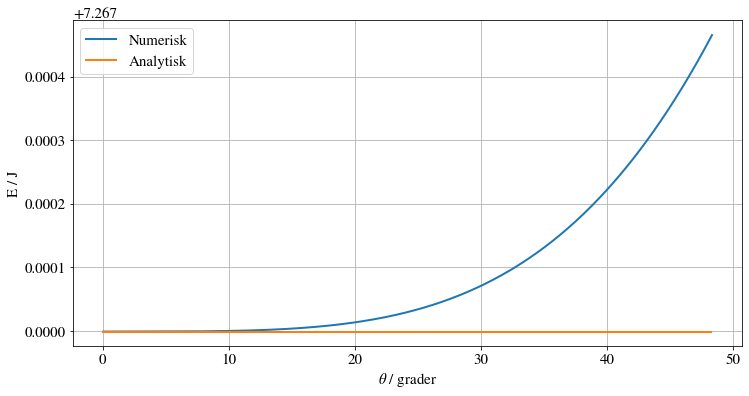

In [14]:
#Finner prosent økning i energi for numerisk løsninge 
print((E_num[-1] - E_num[0])*100/E_num[0])

plt.plot(thetas, E_num, label ="Numerisk")
plt.plot(theta_analytic, E_analytic, label="Analytisk")
plt.legend()
plt.grid()
plt.xlabel(r"$\theta$ / grader")
plt.ylabel("E / J")

<h2>Oppgave 2</h2>

In [29]:
#Oppgave 2


r = 0.025             #[m] Avstanden fra banen opp til massesenter av objektet
R = 0.5              #[m] Radius til banen
m = 1.411              #[kg] Massen til objektet
g = 9.81             #[m/s^2] Gravitasjonsakselerasjonen
dt = 0.0001           #[s] tidssteg for eulers metode
theta0 = 0.0817      #[rad] Slippvinkel for objektet (større enn null, ellers ville det ha stått i ro på toppen)
c = 1/2              #Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet. 

#Laster inn eksperimentelle data for en sylinder med parametrene gitt over. Denne linjen kan kommenters ut dersom man
#ikke har de eksperimentelle dataene
df_komp_sylinder = df[df["file"] == "Kompakt-Sylinder-Topp-fmax.txt"]


#Funskjon som regner ut den analytiske hastigheten ved en vinkel langs banen, og returnerer denne. [m/s].
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#theta0: [rad] vinkelen objektet slippes fra
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def v(theta, theta0, g, R, r, c):
    return np.sqrt(2*g*(R+r)*(np.cos(theta0) - np.cos(theta))/(1+c))


#Funksjon som regner ut normalkraften fra banen på objektet ved en vinkel langs banen og returnerer denne [N].  
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#theta0: [rad] vinkelen objektet slippes fra
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def N(theta, theta0, m, g, c):
    return m*g*((1+2/(1+c))*np.cos(theta) - 2/(1+c)*np.cos(theta0))


#Funksjon som regner ut analytisk vinkelen som objektet faller av banen ved, og returnerer denn [rad].
#Parametre:
#theta0: [rad] vinkelen objektet slippes fra
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def theta_crit(theta0, c):
    return np.arccos(2/(3+c) * np.cos(theta0))


#Funksjon som regner ut ett skritt av eulers metode for ligningssystemet til denne oppgaven, og legger til verdiene i lister
#Parametre:
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#ts: liste med tidsverdier
#thetas: liste med vinkler
#dt: [s] tidssteg for denne iterasjonen
#ws: liste med vinkelhastigheter
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def euler_step(ts, dt, g, thetas, r, R, ws, c):
    ts.append(ts[-1] + dt)
    ws.append(ws[-1] + g*np.sin(thetas[-1])/((1+c)*(r+R))*dt)
    thetas.append(thetas[-1] + ws[-2]*dt)
    
    
    
#Funksjon som regner ut tid, vinkelhastighet og vinkel til denne oppgaven ved hjelp av eulers metode.
#Returnerer: liste med vinkler [rad], liste med vinkelhastigheter [rad/s], liste med tidspunkt [s]
#Parametre:
#dt: [s] tidssteg
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#theta0: [rad] vinkelen objektet slippes fra
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def euler(dt, g, r, R, theta0, c):
    ts = [0]
    ws = [0]
    thetas = [theta0]
    while(N(thetas[-1], theta0, m, g, c) > 0):
        euler_step(ts, dt, g, thetas, r, R, ws, c)
        
    return np.array(thetas), np.array(ws), np.array(ts)


#Bruker Eulers metode til å finne vinkel, vinkelhastighet og tid for objektet langs banen
thetas, ws, ts = euler(dt, g, r, R, theta0, c)

#Finner x-posisjon, y-posisjon og hastihet fra den numeriske løsningen
xs = (R+r)*np.sin(thetas)    
ys = (r+R)*np.cos(thetas)
vs = (R+r)*ws

#Finner analytisk hastihet og vinkler
theta_analytic = np.linspace(theta0, theta_crit(theta0, c),100)
v_analytic = v(theta_analytic, theta0, g, R, r, c)

#Regner ut numerisk og analytisk mekansik energi
E_num = 1/2 * m * ((1+c) * vs**2 + 2*g*(R+r)*np.cos(thetas))
E_analytic = 1/2 * m* ((1+c)*v_analytic**2 + 2*g*(R+r)*np.cos(theta_analytic))

#Konverterer til grader
theta_analytic = theta_analytic*180/np.pi
thetas = thetas*180/np.pi

print(f"Sluttvinkel: {thetas[-1]:.03}")
df_komp_sylinder = df_komp_sylinder.iloc[5:]
df_komp_sylinder["t"] = df_komp_sylinder["t"] - 0.05
# print(thetas)
# print(vs)
df_komp_sylinder

Sluttvinkel: 55.3


,file,t,v,x,y,θ_{r},theta
1040,Kompakt-Sylinder-Topp-fmax.txt,0.01,0.026332,0.043600,0.526845,1.488227,4.730874
1041,Kompakt-Sylinder-Topp-fmax.txt,0.02,0.039852,0.044010,0.526811,1.487449,4.775442
1042,Kompakt-Sylinder-Topp-fmax.txt,0.03,0.041406,0.044397,0.526828,1.486722,4.817091
1043,Kompakt-Sylinder-Topp-fmax.txt,0.04,0.042904,0.044837,0.526856,1.485898,4.864327
1044,Kompakt-Sylinder-Topp-fmax.txt,0.05,0.045184,0.045255,0.526853,1.485110,4.909464
...,...,...,...,...,...,...,...
1135,Kompakt-Sylinder-Topp-fmax.txt,0.96,1.682357,0.420340,0.340586,0.680967,50.983458
1136,Kompakt-Sylinder-Topp-fmax.txt,0.97,1.730843,0.430845,0.326603,0.648634,52.835983
1137,Kompakt-Sylinder-Topp-fmax.txt,0.98,1.799404,0.441513,0.313199,0.616991,54.649009
1138,Kompakt-Sylinder-Topp-fmax.txt,0.99,1.881810,0.452783,0.298074,0.582199,56.642434


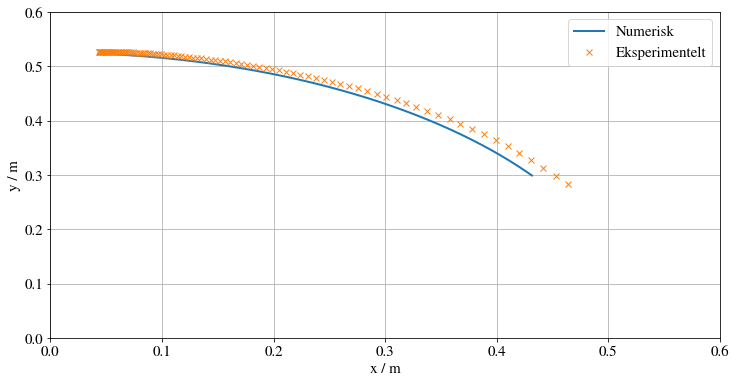

In [30]:
#Plotter de eksperimentelle dataene sammen med de numeriske. Man kan kommentere ut neste linje dersom man ikke har
#de eksperimentelle dataene
plt.plot(xs, ys, label="Numerisk")
plt.plot(df_komp_sylinder["x"], df_komp_sylinder["y"], "x",label="Eksperimentelt")
plt.xlim(0, 0.6)
plt.ylim(0, 0.6)
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.grid()
plt.legend()
plt.show()

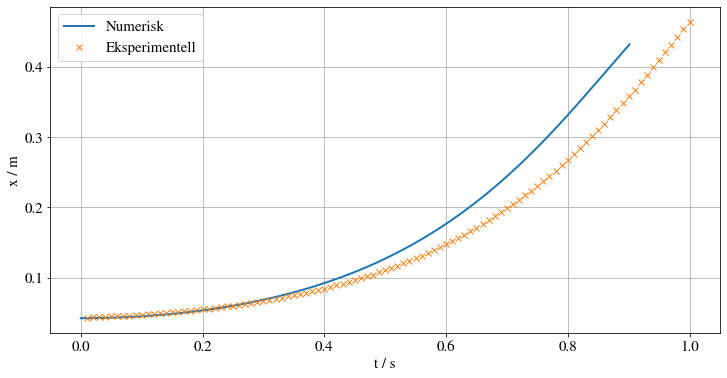

In [34]:
plt.plot(ts, xs, label = "Numerisk")
plt.plot(df_komp_sylinder["t"], df_komp_sylinder["x"], "x", label="Eksperimentell")
plt.xlabel("t / s")
plt.ylabel("x / m")
plt.grid()
plt.legend()
plt.show()

0.00010239825615676601


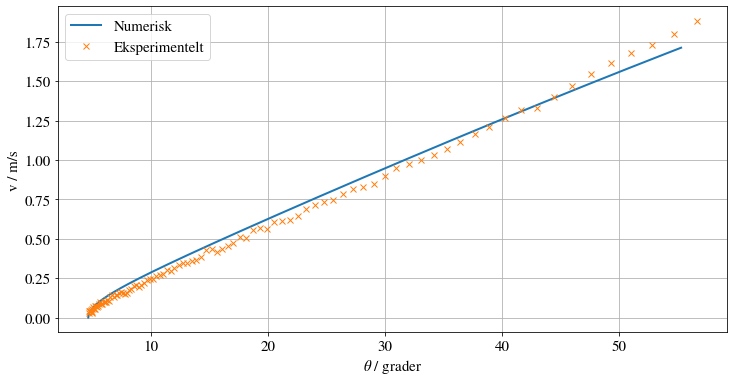

In [37]:
plt.plot(thetas, vs, label="Numerisk")
# plt.plot(theta_analytic, v_analytic, "--",label = "Analytisk")
plt.plot(df_komp_sylinder["theta"], df_komp_sylinder["v"], "x",label="Eksperimentelt")
plt.xlabel(r"$\theta$ / grader")
plt.ylabel("v / m/s")
plt.legend()
plt.grid()
print(vs[-1] - v_analytic[-1])

Text(0, 0.5, 'E / J')

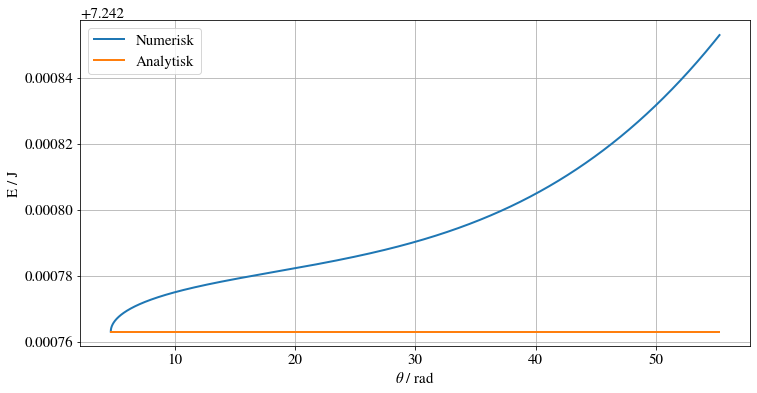

In [21]:
plt.plot(thetas, E_num, label ="Numerisk")
plt.plot(theta_analytic, E_analytic, label="Analytisk")
plt.legend()
plt.grid()
plt.xlabel(r"$\theta$ / rad")
plt.ylabel("E / J")

<h2>Oppgave 3</h2>

0.8278908629207833
0.9745456194178298
Sluttvinkel: 55.8


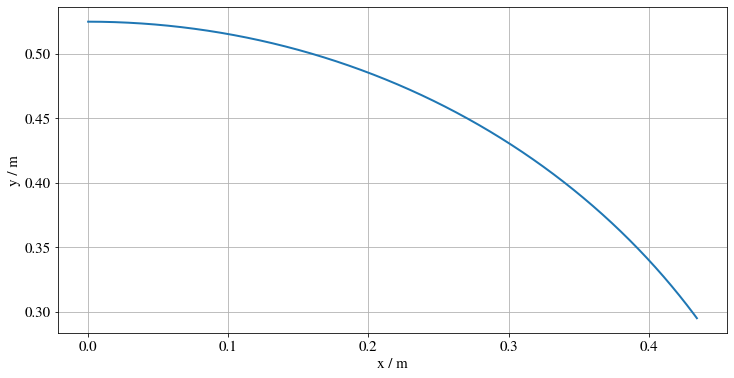

In [123]:
#Oppgave 3
r = 0.05/2             #[m] Avstanden fra banen opp til massesenter av objektet
R = 0.5              #[m] Radius til banen
m = 1.411              #[kg] Massen til objektet
g = 9.81             #[m/s^2] Gravitasjonsakselerasjonen
dt = 0.0001           #[s] tidssteg for eulers metode
theta0 = 0.0001        #[rad] Slippvinkel for objektet (større enn null, ellers ville det ha stått i ro på toppen)
c = 1/2              #Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
fk_kinetisk = 0.6     #Friksjonskoeffisient for kinetisk friksjon
fk_statisk = 1        #Friksjonskoeffisient for statisk friksjon




#Funksjon som regner ut normalkraften fra banen på objektet ved en vinkel langs banen og returnerer denne [N].  
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#v: [m/s] Hastighet til objektet
#m: [kg] masse til objektet
#r:  [m] Avstanden fra banen opp til massesenter av objektet
def N(theta, v, m, g, R, r):
    return m*g*np.cos(theta)-m*(v**(2))/(R+r)


#Funksjon som finner rullefriksjonen ved en vinkel langs banen og returnerer denne. [N].
#Parametre:
#theta: [rad] vinkelen objeket befinner seg ved. theta=0 settes for toppen av banen
#g: [m/s^2] Gravitasjonsakselerasjonen
#m: [kg] masse til objektet
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def f(theta, c, g, m):
    return (c*g*m*np.sin(theta))/(c+1) 


#Funksjon som regner ut ett skritt av eulers metode for ligningssystemet under ren rulling til denne oppgaven, og legger til verdiene i lister
#Parametre:
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#ts: liste med tidsverdier
#thetas: liste med vinkler
#dt: [s] tidssteg for denne iterasjonen
#vs: liste med hastigheter
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
def euler_step_rulling(ts, dt, g, thetas, r, R, vs, c):
    ts.append(ts[-1] + dt)
    thetas.append(thetas[-1] + vs[-1]*dt/(r+R))
    vs.append(vs[-1] + (g*np.sin(thetas[-2]))/(1+c)*dt)
    

#Funksjon som regner ut ett skritt av eulers metode for ligningssystemet under ren rulling til denne oppgaven, og legger til verdiene i lister
#Parametre:
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#ts: liste med tidsverdier
#thetas: liste med vinkler
#dt: [s] tidssteg for denne iterasjonen
#vs: liste med hastigheter
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
#m: [kg] masse til objektet
#f_kinetisk: Friksjonskoeffisient for kinetisk friksjon
def euler_step_sluring(ts, dt, g, thetas, r, R, vs, m, f_kinetisk, c):
    ts.append(ts[-1] + dt)
    thetas.append(thetas[-1] + vs[-1]*dt/(r+R))
    frik_sluring = fk_kinetisk*N(thetas[-2], vs[-1], m, g, R, r)
    vs.append(vs[-1] + (g*np.sin(thetas[-2])/(1+c)-(frik_sluring/m))*dt)
        
        
#Funksjon som regner ut tid, hastighet og vinkel til denne oppgaven ved hjelp av eulers metode.
#Returnerer: liste med vinkler [rad], liste med hastigheter [m/s], liste med tidspunkt [s]
#Parametre:
#dt: [s] tidssteg
#g: [m/s^2] Gravitasjonsakselerasjonen
#R: [m] Radius til banen
#r: [m] avstanden fra banen til massesenteret til objektet
#theta0: [rad] vinkelen objektet slippes fra
#c: Konstant bestemt av treghetsmomentet gjennom massesenteret til objektet.
#f_kinetisk: Friksjonskoeffisient for kinetisk friksjon
#fk_statisk: Maks friksjonskoeffisient for statisk friksjon
#m: [kg] masse til objektet
def euler(dt, g, r, R, theta0, fk_statisk, m, c, f_kinetisk):
    ts = [0]
    vs = [0]
    thetas = [theta0]
    while(N(thetas[-1], vs[-1], m, g, R, r)*fk_statisk > f(thetas[-1], c, g, m)):
        euler_step_rulling(ts, dt, g, thetas, r, R, vs, c)
    
    theta_overgang = thetas[-1]
    
    while(N(thetas[-1], vs[-1], m, g, R, r)>0):
        euler_step_sluring(ts, dt, g, thetas, r, R, vs, m, f_kinetisk, c)
    
    return np.array(thetas), np.array(vs), np.array(ts), theta_overgang


#Bruker Eulers metode til å finne vinkel, hastighet og tid for objektet langs banen
thetas, vs, ts, theta_overgang = euler(dt, g, r, R, theta0, fk_statisk, m, c, fk_kinetisk)

#Finner x-posisjon, y-posisjon fra den numeriske løsningen
xs = (R+r)*np.sin(thetas)    
ys = (r+R)*np.cos(thetas)

#Regner ut numerisk og analytisk mekansik energi
E_num = 1/2 * m *(1+c) * vs**2 + m*g*(R+r)*np.cos(thetas)

K_num = 1/2 * m * (1+c) * vs**2
V_num = m * g*(R+r)*np.cos(thetas)

print(theta_overgang)
print(thetas[-1])
print(f"Sluttvinkel: {thetas[-1]*180/np.pi:.03}")
plt.plot(xs, ys)
plt.xlabel("x / m")
plt.ylabel("y / m")
plt.grid()
plt.show()

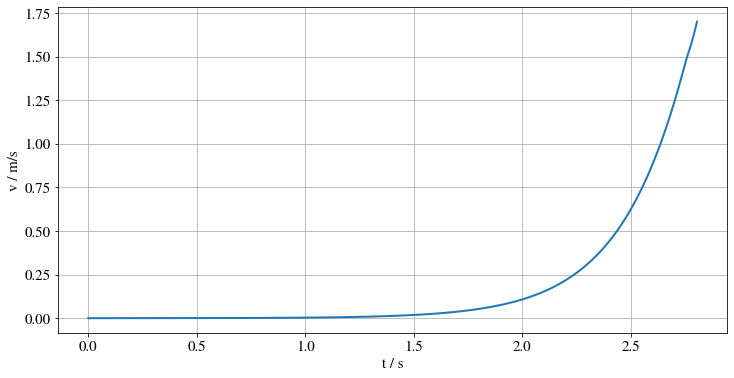

In [124]:
plt.plot(ts, vs)
plt.xlabel("t / s")
plt.ylabel("v / m/s")
plt.grid()
plt.show()

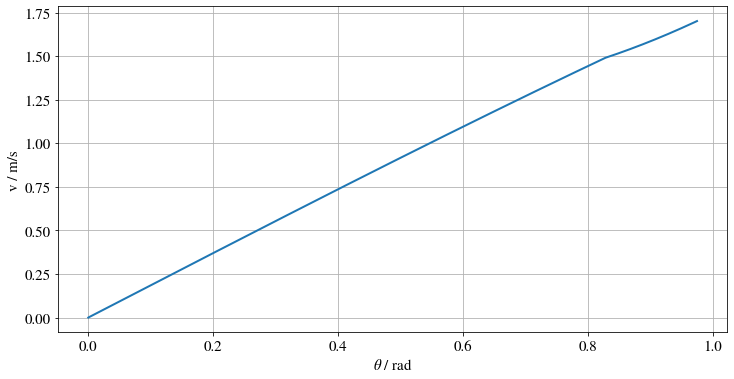

In [125]:
plt.plot(thetas, vs, label="Numerisk")
# plt.plot(theta_analytic, v_analytic, label = "Analytisk")
plt.xlabel(r"$\theta$ / rad")
plt.ylabel("v / m/s")
# plt.legend()
plt.grid()

Text(0, 0.5, 'E / J')

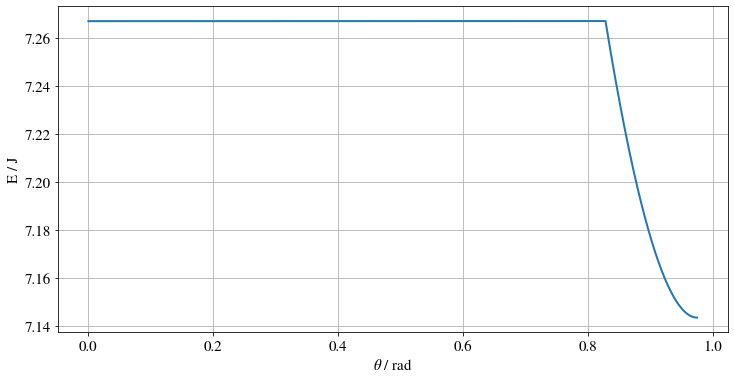

In [127]:
K_num = 1/2 * m * (1+c) * vs**2
V_num = m * g*(R+r)*np.cos(thetas)
plt.plot(thetas, E_num, label="Numerisk")
# plt.plot(thetas, K_num, label="K")
# plt.plot(thetas, V_num, label = "V")
# plt.legend()
# plt.ylim(5, 6)
plt.grid()
plt.xlabel(r"$\theta$ / rad")
plt.ylabel("E / J")